# Assignment 4 Solution: Introduction to pycalphad

User questions and feedback can be directed to the [pycalphad Google Group](https://groups.google.com/forum/#!forum/pycalphad). Bugs can be reported to the [GitHub repo](https://github.com/pycalphad/pycalphad).

## 1. Ensure pycalphad is installed. For this you will need at version ``0.5.2``. If this version is not available, please install the development version.


[Installation guide](https://pycalphad.org/docs/latest/INSTALLING.html)

## 2. Open the pycalphad API documentation in your browser as well as the pycalphad examples. The rest of this assignment can be completed by using and adapting the code in the examples and referring to the API documentation for more information.

* [API docs](https://pycalphad.org/docs/latest/api/modules.html)
* [pycalphad examples](https://github.com/pycalphad/pycalphad/tree/develop/examples)

## 3. Start up an interactive Python interpreter (or, preferably, a Jupyter notebook) and create a pycalphad Database from the ``Ag-Bi-Cu-Pb-Sb-Sn-nist-solders.tdb`` thermodynamic database in this directory.


In [2]:
from pycalphad import Database
solder_dbf = Database('Ag-Bi-Cu-Pb-Sb-Sn-nist-solders.tdb')

## 4. The Database object you just created has a ``phases`` attribute that is a dictionary. Print this dictionary. The keys are the phase names and the values are ``Phase`` objects. Each phase object has a ``constituents`` attribute that returns a tuple of the sublattice model for that phase. Print the sublattice model of the ``BCC_A2`` phase and confirm that the sublattice model is ``((CU, SN), (VA))``. Note that the sublattices are wrapped as ``frozensets``. A ``frozenset`` is an immutable version of ``set``.


In [3]:
print(solder_dbf.phases, end='\n\n')
print('BCC_A2 sublattice model:')
print(solder_dbf.phases['BCC_A2'].constituents)

{'HCP_A3': Phase({'model_hints': {}, 'sublattices': (1.0, 0.5), 'name': 'HCP_A3', 'constituents': (frozenset({'SB', 'SN', 'PB', 'BI', 'AG'}), frozenset({'VA'}))}), 'RHOMBO_A7': Phase({'model_hints': {}, 'sublattices': (1.0,), 'name': 'RHOMBO_A7', 'constituents': (frozenset({'SB', 'SN', 'PB', 'BI'}),)}), 'CU10SN3': Phase({'model_hints': {}, 'sublattices': (0.769, 0.231), 'name': 'CU10SN3', 'constituents': (frozenset({'CU'}), frozenset({'SN'}))}), 'DO3': Phase({'model_hints': {}, 'sublattices': (0.75, 0.25), 'name': 'DO3', 'constituents': (frozenset({'CU', 'SN'}), frozenset({'CU', 'SN'}))}), 'LIQUID': Phase({'model_hints': {}, 'sublattices': (1.0,), 'name': 'LIQUID', 'constituents': (frozenset({'CU', 'BI', 'PB', 'AG', 'SB', 'SN'}),)}), 'CU41SN11': Phase({'model_hints': {}, 'sublattices': (0.788, 0.212), 'name': 'CU41SN11', 'constituents': (frozenset({'CU'}), frozenset({'SN'}))}), 'CU6SN5_L': Phase({'model_hints': {}, 'sublattices': (0.545, 0.455), 'name': 'CU6SN5_L', 'constituents': (fro

## 5. The ``SN-PB`` system.

### i. The tin-lead system is a simple eutectic system with only three phases. Import ``binplot`` from pycalphad and use the ``binplot`` function to plot the binary phase diagram of the ``SN-PB`` system described in the database you created. Use the phases ``['LIQUID', 'BCT_A5', 'FCC_A1']``. Use conditions ``P=101325, T=(300, 700, 5), X(SN)=(0,1,0.005)``. Identify each single and two phase region.

**Remember to use the ``%matplotlib inline`` magic if you are using a Jupyter Notebook!**


/Users/brandon/.virtualenvs/pycalphad/lib/python3.5/site-packages/dask/async.py:13: UserWarning: `dask.async.get_sync` has been moved to `dask.local.get_sync`, please update your imports
  warnings.warn(_msg.format('get_sync'))


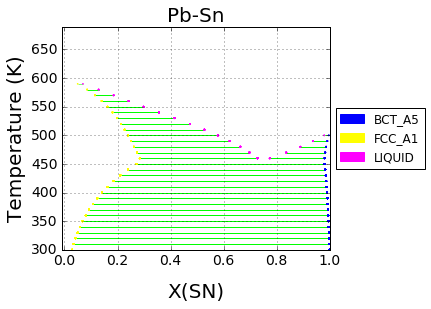

In [4]:
%matplotlib inline
from pycalphad import binplot, variables as v
comps = ['PB', 'SN', 'VA']
phases = ['LIQUID', 'BCT_A5', 'FCC_A1']
conds = {v.P: 101325, v.T: (300, 700, 10), v.X('SN'): (0, 1, 0.01)}
binplot(solder_dbf, comps, phases, conds)

### ii. Use ``calculate`` from pycalphad to calculate Gibbs free energies for each of these phases. Use the xarray Dataset returned from the ``calculate`` function and matplotlib to plot the free energy curves as a function of composition. Do this at 400 K, 450 K, 475 K and 600 K. Try to use the ``pycalphad.plot.utils.phase_legend`` function to create a phase legend

See cell 6 in the [pycalphad binary examples](https://github.com/pycalphad/pycalphad/blob/develop/examples/BinaryExamples.ipynb) for an example.


/Users/brandon/Projects/pycalphad/pycalphad/core/utils.py:57: RuntimeWarning: divide by zero encountered in log
  pts = -np.log(pts)
/Users/brandon/Projects/pycalphad/pycalphad/core/utils.py:61: RuntimeWarning: invalid value encountered in true_divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


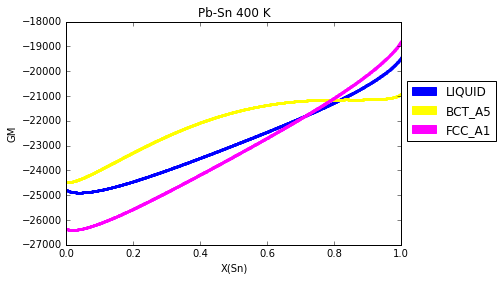

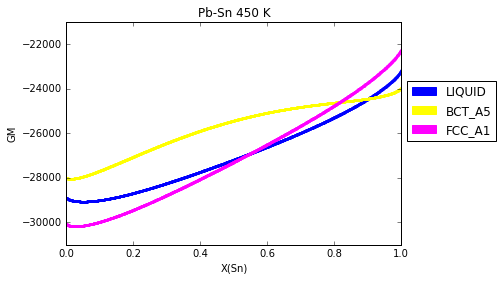

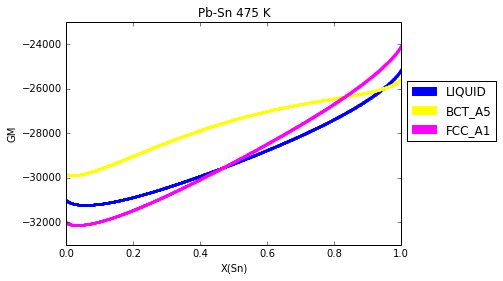

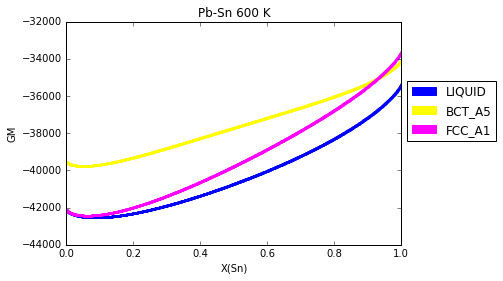

In [5]:
from pycalphad import calculate
from pycalphad.plot.utils import phase_legend
import matplotlib.pyplot as plt
import numpy as np

legend_handles, colorlist = phase_legend(phases)

temperatures = 400, 450, 475, 600
for temp in temperatures:
    fig = plt.figure()
    ax = fig.gca()
    ax.set_title('Pb-Sn {} K'.format(temp))
    ax.set_ylabel('GM')
    ax.set_xlabel('X(Sn)')
    for phase in phases:
        result = calculate(solder_dbf, comps, phase, T=temp, P=101325, output='GM')
        ax.scatter(result.X.sel(component='SN'), result.GM,
                   marker='.', s=5, color=colorlist[phase.upper()])
    ax.set_xlim((0, 1))
    ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))


## 6. The `BI-PB` binary system.

### i. Like before, would like to plot a phase diagram. This time, there might be more stable phases and we would like to specify by hand. Write a function (possibly called ``filter_active_phases``) to take a pycalphad Database and a list of compositions and return a list of only active phases. An active phase can be defined by a phase that has at least one of the desired components in each sublattice. E.g. a sublattice model of ``((BI,SN), (PB,SN))`` is valid for the components ``BI-PB-VA``, but the sublattice model ``((BI,SN), (SN))`` is not because the second sublattice does not contain any of the components. If you have done this right, running the function should return ``['RHOMBO_A7', 'LIQUID', 'HCP_A3', 'FCC_A1', 'BCT_A5']`` for ``BI-PB-VA`` components. *Hint: use ``set`` methods*


In [6]:
def filter_active_phases(dbf, comps):
    active_phases = []
    for phase_name, phase in dbf.phases.items():
        sublattice_is_valid = [] # a list of booleans, e.g. [True, True, True] means that all 3 sublattices are valid
        for sublattice in phase.constituents:
            valid_sublattice =  len(set(comps).intersection(sublattice)) > 0
            sublattice_is_valid.append(valid_sublattice)
        if all(sublattice_is_valid):
            active_phases.append(phase_name)
    return active_phases

phases = filter_active_phases(solder_dbf, ['BI', 'PB', 'VA'])
print('Active phase {}'.format(phases))
print('Inactive phases {}'.format(solder_dbf.phases.keys() - set(phases)))

Active phase ['HCP_A3', 'RHOMBO_A7', 'LIQUID', 'FCC_A1', 'BCT_A5']
Inactive phases {'DO3', 'CU10SN3', 'CU41SN11', 'CU6SN5_L', 'CU3SN', 'CU6SN5', 'EPSILON', 'BCC_A2', 'SBSN', 'SB2SN3'}


### ii. Perform an ``equilibrium`` calculation with pycalphad using the active phases from your function and the conditions ``P=101325, T=(300, 700, 10), X(PB)=(0,1,0.02)``. Store the result in a variable, such as ``eq_result``.


In [7]:
from pycalphad import equilibrium
comps = ['BI', 'PB', 'VA']
phases = filter_active_phases(solder_dbf, comps)
conds = {v.P: 101325, v.T: (300, 700, 10), v.X('PB'): (0, 1, 0.02)}
eq_result = equilibrium(solder_dbf, comps, phases, conds)
print(eq_result)

/Users/brandon/.virtualenvs/pycalphad/lib/python3.5/site-packages/dask/async.py:13: UserWarning: `dask.async.get_sync` has been moved to `dask.local.get_sync`, please update your imports
  warnings.warn(_msg.format('get_sync'))


<xarray.Dataset>
Dimensions:       (P: 1, T: 40, X_PB: 50, component: 2, internal_dof: 3, vertex: 2)
Coordinates:
  * P             (P) float64 1.013e+05
  * T             (T) float64 300.0 310.0 320.0 330.0 340.0 350.0 360.0 ...
  * X_PB          (X_PB) float64 1e-09 0.02 0.04 0.06 0.08 0.1 0.12 0.14 ...
  * vertex        (vertex) int64 0 1
  * component     (component) <U2 'BI' 'PB'
  * internal_dof  (internal_dof) int64 0 1 2
Data variables:
    GM            (P, T, X_PB) float64 -1.702e+04 -1.71e+04 -1.717e+04 ...
    MU            (P, T, X_PB, component) float64 -1.702e+04 -5.613e+04 ...
    X             (P, T, X_PB, vertex, component) float64 1.0 1e-09 nan nan ...
    NP            (P, T, X_PB, vertex) float64 1.0 nan 0.973 0.02703 0.9438 ...
    Phase         (P, T, X_PB, vertex) <U9 'RHOMBO_A7' '' 'RHOMBO_A7' ...
    Y             (P, T, X_PB, vertex, internal_dof) float64 1.0 1e-09 nan ...
Attributes:
    engine: pycalphad 0.5.1+12.gc4e4ab3.dirty
    created: 2017-08-03T16:45

### iii. Plot the binary phase diagram, but instead of using binplot, which will run another equilibrium calculation, import ``eqplot`` (``from pycalphad.plot.eqplot import eqplot``) and simply pass in the Dataset returned from the equilibrium calculation.

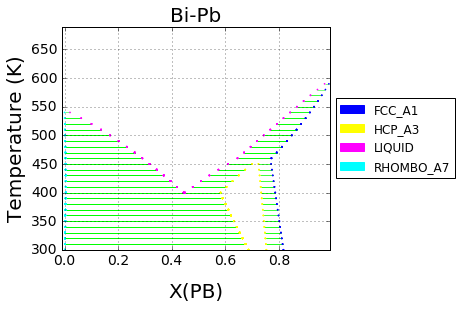

In [8]:
from pycalphad.plot.eqplot import eqplot
eqplot(eq_result)

### iv. Previously we calculated and plotted Gibbs free energy for each phase using ``calculate``. We can use ``calculate`` to give us properties for individual phases, but often equilibrium properties are of interest. Use ``equilibrium`` to calculate and plot the equilibrium free energy as a function of composition at 425 K. Bonus: plot the free energies of the phases on top of this plot.


/Users/brandon/.virtualenvs/pycalphad/lib/python3.5/site-packages/dask/async.py:13: UserWarning: `dask.async.get_sync` has been moved to `dask.local.get_sync`, please update your imports
  warnings.warn(_msg.format('get_sync'))


<xarray.Dataset>
Dimensions:       (P: 1, T: 1, X_PB: 200, component: 2, internal_dof: 3, vertex: 2)
Coordinates:
  * P             (P) float64 1.013e+05
  * T             (T) float64 425.0
  * X_PB          (X_PB) float64 1e-09 0.005 0.01 0.015 0.02 0.025 0.03 ...
  * vertex        (vertex) int64 0 1
  * component     (component) <U2 'BI' 'PB'
  * internal_dof  (internal_dof) int64 0 1 2
Data variables:
    GM            (P, T, X_PB) float64 -2.473e+04 -2.478e+04 -2.482e+04 ...
    MU            (P, T, X_PB, component) float64 -2.473e+04 -8.642e+04 ...
    X             (P, T, X_PB, vertex, component) float64 1.0 1e-09 nan nan ...
    NP            (P, T, X_PB, vertex) float64 1.0 nan 0.9988 0.001155 ...
    Phase         (P, T, X_PB, vertex) <U9 'RHOMBO_A7' '' 'RHOMBO_A7' ...
    Y             (P, T, X_PB, vertex, internal_dof) float64 1.0 1e-09 nan ...
Attributes:
    engine: pycalphad 0.5.1+12.gc4e4ab3.dirty
    created: 2017-08-03T16:45:25.782247


/Users/brandon/Projects/pycalphad/pycalphad/core/utils.py:57: RuntimeWarning: divide by zero encountered in log
  pts = -np.log(pts)
/Users/brandon/Projects/pycalphad/pycalphad/core/utils.py:61: RuntimeWarning: invalid value encountered in true_divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


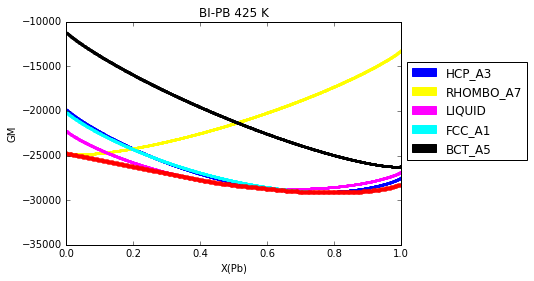

In [9]:
from pycalphad import equilibrium
conds = {v.P: 101325, v.T: 425, v.X('PB'): (0, 1, 0.005)}
eq_result = equilibrium(solder_dbf, comps, phases, conds)
print(eq_result)

legend_handles, colorlist = phase_legend(phases)

fig = plt.figure()
ax = fig.gca()
ax.set_title('BI-PB 425 K')
ax.set_ylabel('GM')
ax.set_xlabel('X(Pb)')
for phase in phases:
    result = calculate(solder_dbf, comps, phase, T=425, P=101325, output='GM')
    ax.scatter(result.X.sel(component='PB'), result.GM,
               marker='.', s=5, color=colorlist[phase.upper()])
# finally plot the equilibrium values
ax.scatter(eq_result.X_PB, eq_result.GM, c='r', lw=0)
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))


## 7. The ``DO3`` phase.
### i. The phases we have looked at so far have had very simple sublattice models. The DO3 sublattice model is ``((CU, SN), (CU, SN))`` with sublattice site ratios of ``(0.75, 0.25)``. That means there can be four different endmembers (an endmember has no mixing within sublattices) of this phase, pure Cu and pure Sn (``((CU), (CU))`` and ``((SN), (SN))``), ``CU-25SN`` (``((CU), (SN))``), and ``SN-25CU`` (``((SN), (CU))``). Then with mixing, the entire free energy surface between these endmembers can be calculated. Use ``calculate`` to plot the free energy surface of this phase at 500 K and find the endmembers.


/Users/brandon/Projects/pycalphad/pycalphad/core/utils.py:57: RuntimeWarning: divide by zero encountered in log
  pts = -np.log(pts)
/Users/brandon/Projects/pycalphad/pycalphad/core/utils.py:61: RuntimeWarning: invalid value encountered in true_divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


(0, 1)

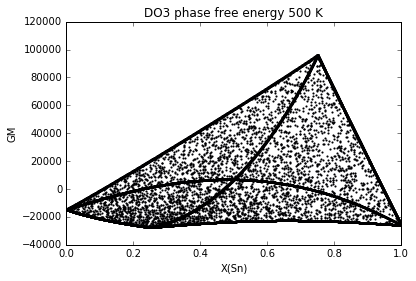

In [11]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('DO3 phase free energy 500 K')
ax.set_ylabel('GM')
ax.set_xlabel('X(Sn)')
result = calculate(solder_dbf, ['CU', 'SN'], 'DO3', T=500, P=101325, output='GM')
ax.scatter(result.X.sel(component='SN'), result.GM,
           marker='.', s=5,)
ax.set_xlim((0, 1))

### ii. (TODO) On Brandon's Jupyter notebooks repository, there is a thermodynamics folder that contains a free energy surface that interactively changes with temperature


## 8. The ``AG-BI-CU`` system.


### i. Finally, we will look at a ternary system. pycalphad supports arbitrarily large multicomponent systems. To save time, a precalculated Ag-Bi-Cu ternary system from 300 K to 1600 K. Use xarray's ``open_dataset`` function to create a Dataset from the ``Ag-Bi-Cu-eq.nc`` file in this folder.


In [12]:
import xarray as xr
eq_tern = xr.open_dataset('Ag-Bi-Cu-eq.nc')

### ii. Select several temperature slices (with the Dataset methods) of that ternary Dataset. Use the same ``eqplot`` function as earlier to plot these temperatures slices as isotherms.


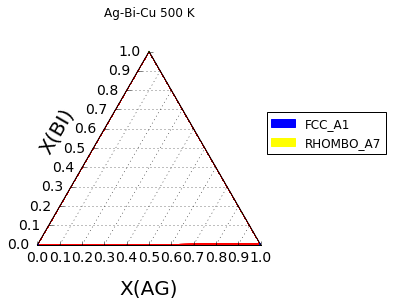

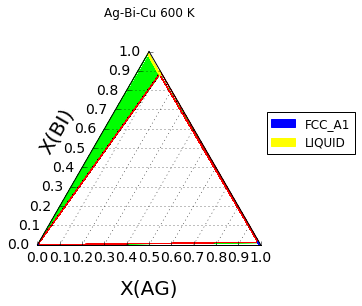

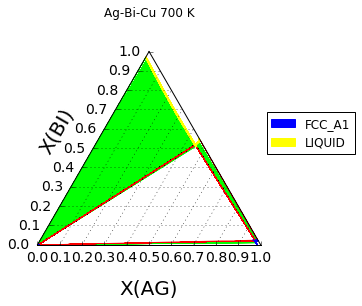

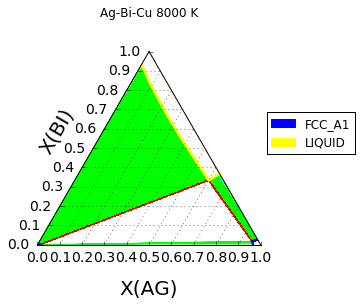

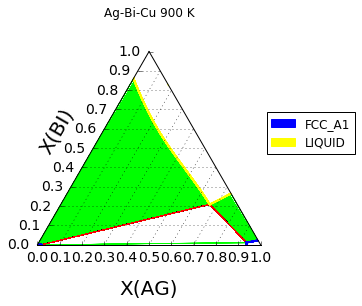

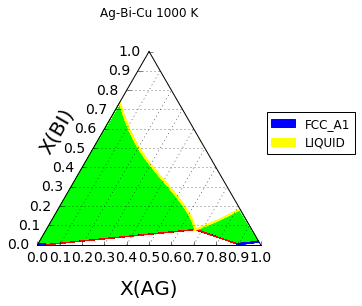

In [13]:
fig = plt.figure()
ax = eqplot(eq_tern.sel(T=[500]))
ax.set_title('Ag-Bi-Cu 500 K')
fig = plt.figure()
ax = eqplot(eq_tern.sel(T=[600]))
ax.set_title('Ag-Bi-Cu 600 K')
fig = plt.figure()
ax = eqplot(eq_tern.sel(T=[700]))
ax.set_title('Ag-Bi-Cu 700 K')
fig = plt.figure()
ax = eqplot(eq_tern.sel(T=[800]))
ax.set_title('Ag-Bi-Cu 8000 K')
fig = plt.figure()
ax = eqplot(eq_tern.sel(T=[900]))
ax.set_title('Ag-Bi-Cu 900 K')
fig = plt.figure()
ax = eqplot(eq_tern.sel(T=[1000]))
ax.set_title('Ag-Bi-Cu 1000 K')
